### Titanic Competition Presented By Edeh Emeka N.


#### **The Challenge**
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: **“what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
titanic_train = pd.read_csv("titanic_train_dataset.csv")
titanic_test = pd.read_csv("titanic_test_dataset.csv")

In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### EDA

In [6]:
titanic_train.shape
#to briefly see the number of rows and columns in my train dataset

(891, 12)

In [8]:
#i will further get the frquency or count of the survivors to non survivors
titanic_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Survived', ylabel='count'>

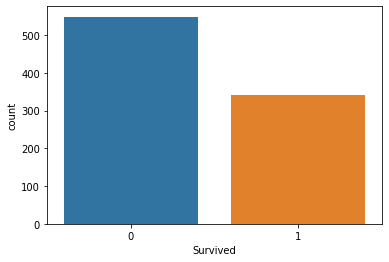

In [9]:
#i can plot the above outcome using the seaborn library
sns.countplot(x = "Survived", data = titanic_train)

**From the above plot, 549 passangers of the train dataset died while 342 passangers survived**

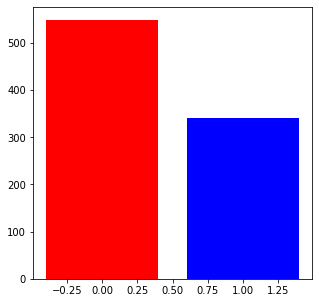

In [16]:
#Alternatively, i can plot the barchart using...
plt.figure(figsize=(5,5))
plt.bar(list(titanic_train['Survived'].value_counts().keys()),list(titanic_train['Survived'].value_counts()), color=["r","b"])
plt.show()


In [19]:
#similarly, i will determine the number of passangers in each class and also plot my result
titanic_train['Pclass'].value_counts()


3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

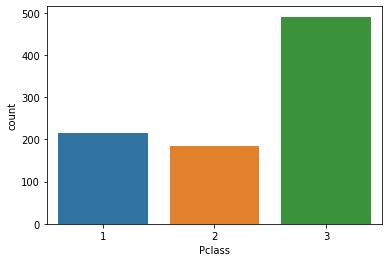

In [20]:
sns.countplot(x = "Pclass", data = titanic_train)

**From the above barplot, we have majority of the passangers(491) in the 3rd class**

In [21]:
#Determining the number of males and females in the train dataset
titanic_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

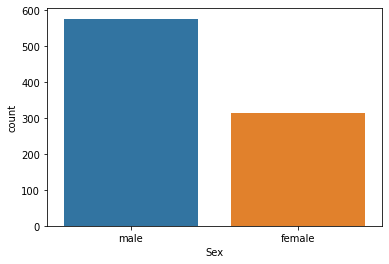

In [22]:
sns.countplot(x = "Sex", data = titanic_train)

**We have 577 males and 314 females in the train dataset**

<AxesSubplot:xlabel='Age', ylabel='Count'>

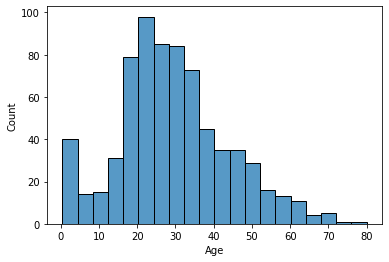

In [23]:
#To check for the age distribution, i will use a histogram since i am considering the "Age" variable which is a continues data
sns.histplot(x = "Age", data = titanic_train)

**From the above distribution, majority of the passangers are betweent the ages of 20 and 35.**

### Data Wrangling/Cleaning

I can't build a model with a dirty data

In [24]:
# Checking for null values
titanic_train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [25]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

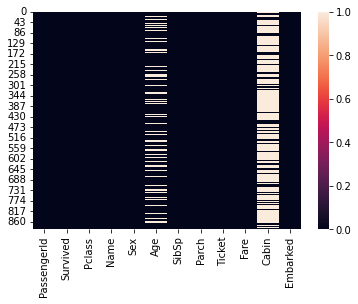

In [27]:
#plotting the heatmap to visualize the null values
sns.heatmap(titanic_train.isnull()) #yticklabels=False)

**From the above heatmap, the purple parts  contain values while the white parts have null values**

In [29]:
titanic_train.drop("Cabin", axis=1, inplace=True)
#"axis=1" or "axis = 'column' removes column while "axis = 0" removes rows. I dropped the "Cabin" column because it has so many
# null/NaN values and this will negatively affect my analysis if not removed. 

In [35]:
#Because the 'Age' variable is going to be my independent variable, i am going to replace all the null values with the
#average age of the passangers
titanic_train=titanic_train.fillna(titanic_train["Age"].mean())


In [36]:
# to confirm
titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Model Building

In [41]:
x_train=titanic_train[["Age"]] #independent variable
y_train=titanic_train[["Survived"]] #dependent variable

I will be using Decision Tree Algorithm which can be used for both classification and Regression problems

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
algo=DecisionTreeClassifier()

In [43]:
algo.fit(x_train,y_train)

DecisionTreeClassifier()

### The prediction

In [44]:
#checking for null values in the test dataset
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
#replacing all the null values with the
#average age of the passangers
titanic_test=titanic_test.fillna(titanic_test["Age"].mean())

In [46]:
titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [47]:
x_test=titanic_test[["Age"]]

In [48]:
y_predict=algo.predict(x_test)

In [49]:
y_predict

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [55]:
pd.DataFrame(y_predict).to_csv("titanic_prediction3.csv" , header=None)